## Tomato Disease Classification Using Deep Learning

In this project, We will use deep learning to classify tomato diseases. The dataset contains  leaf images  of three categories: healthy leaves, Yellow_Leaf_Curl_Virus-affected leaves, and Bacterial spot-affected leaves. The dataset is downloaded from Kaggle.

At the end of the first part of the lesson,each student will be abble to:
1. Read multiple images in a folder
2. Understand tensorflow and keras
3. Use the matplotlib library to plot images
4. Do data preprocessing


In [1]:
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [3]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'Tomato_ds',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 4718 files belonging to 3 classes.


In [4]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']

In [5]:
len(images_dataset)

148

In [6]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 0 1 0 2 1 2 1 1 1 2 2 2 1 0 2 0 1 2 2 1 0 1 0 0 2 1 0 0 2 0]


In [7]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())


[[[197. 191. 201.]
  [195. 189. 199.]
  [193. 187. 197.]
  ...
  [ 28.  42.  17.]
  [ 30.  44.  18.]
  [ 31.  45.  19.]]

 [[197. 191. 201.]
  [197. 191. 201.]
  [198. 192. 202.]
  ...
  [ 36.  50.  25.]
  [ 36.  50.  24.]
  [ 36.  50.  24.]]

 [[195. 189. 199.]
  [197. 191. 201.]
  [199. 193. 203.]
  ...
  [ 47.  61.  35.]
  [ 46.  60.  34.]
  [ 45.  59.  33.]]

 ...

 [[151. 145. 155.]
  [148. 142. 152.]
  [157. 151. 161.]
  ...
  [144. 140. 154.]
  [145. 141. 155.]
  [142. 138. 152.]]

 [[155. 149. 159.]
  [146. 140. 150.]
  [150. 144. 154.]
  ...
  [143. 139. 153.]
  [142. 138. 152.]
  [141. 137. 151.]]

 [[150. 144. 154.]
  [139. 133. 143.]
  [140. 134. 144.]
  ...
  [139. 135. 149.]
  [136. 132. 146.]
  [134. 130. 144.]]]


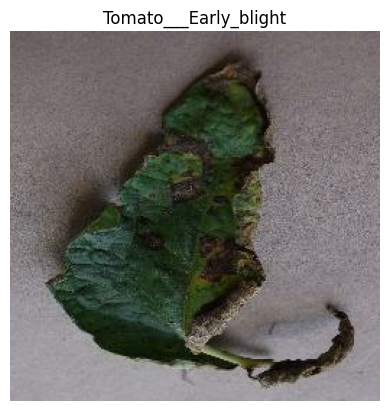

In [8]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')


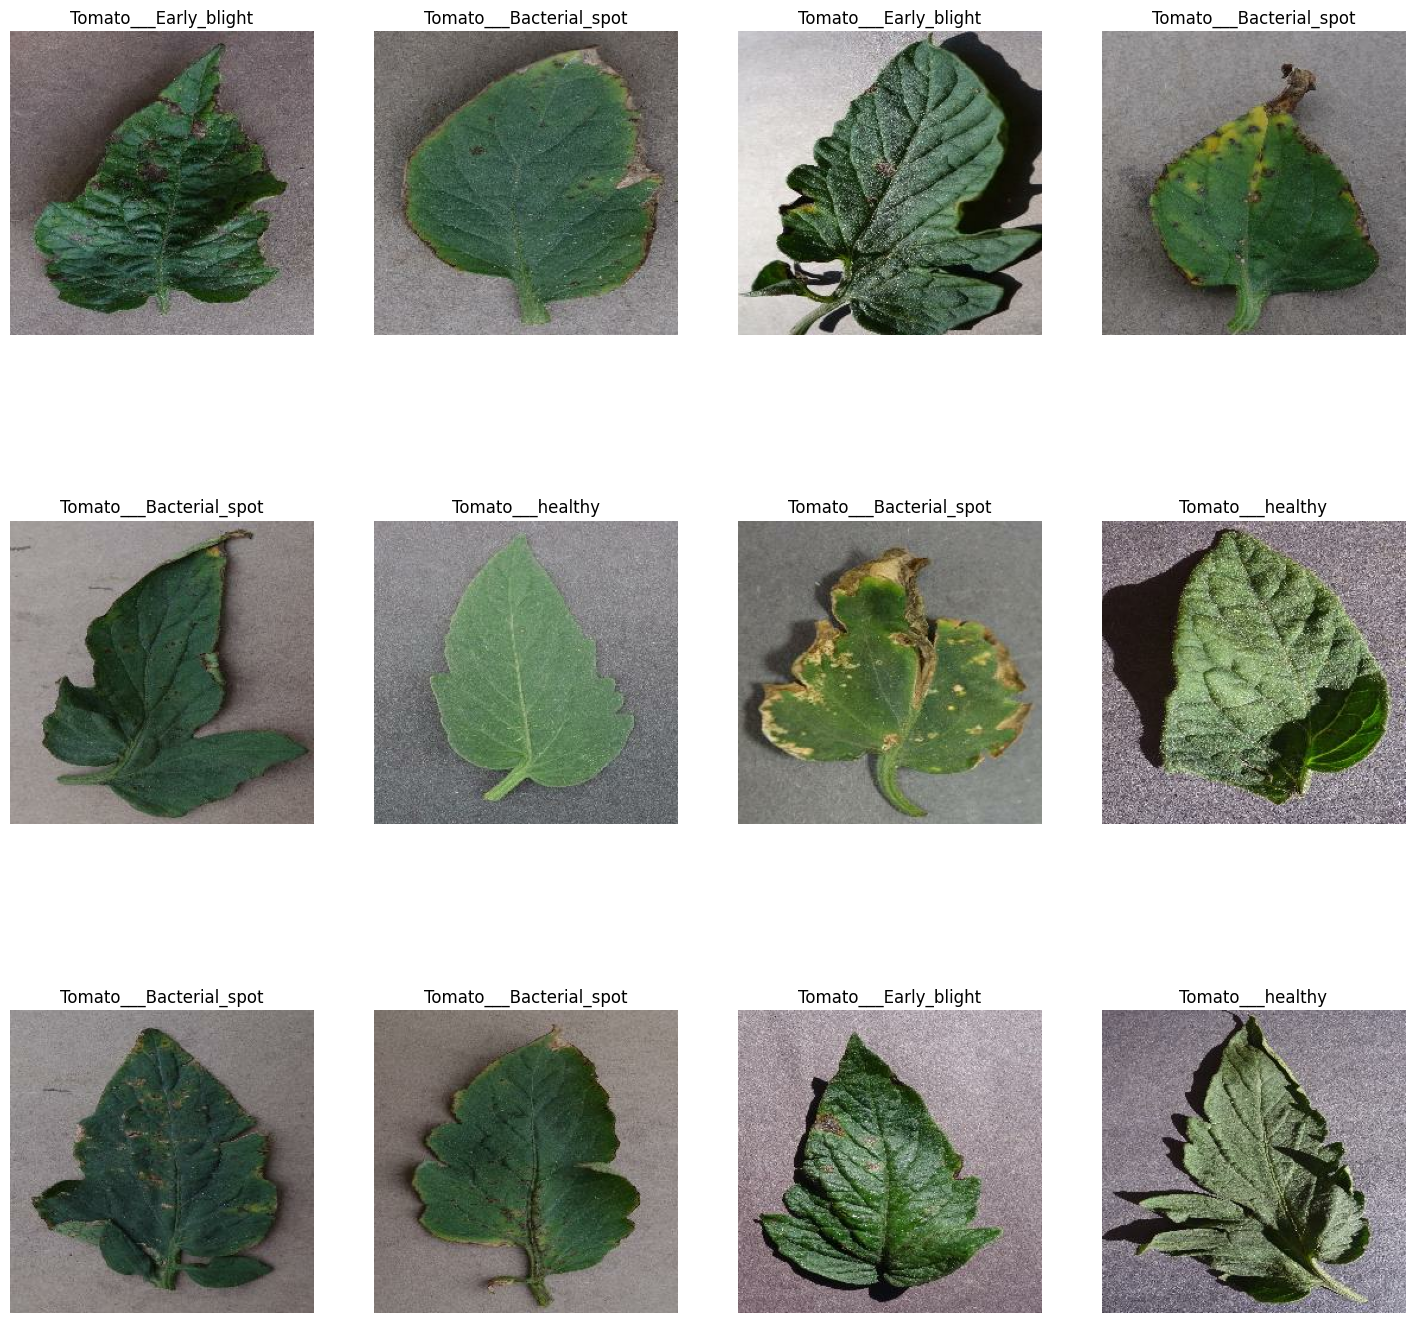

In [9]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
len(images_dataset)

148

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [13]:
print(len(train_ds),len(val_ds),len(test_ds))


118 14 16


In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
resize_and_rescale=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
#building the model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
#compaling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#train the network with the given inputs and the corresponding Labels
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
 85/118 [====================>.........] - ETA: 51s - loss: 0.9219 - accuracy: 0.5899

In [61]:
#evaluate the model
scores=model.evaluate(test_ds)

16/16 [==============================] - 17s 301ms/step - loss: 0.0938 - accuracy: 0.9609


In [62]:
scores

[0.09376607090234756, 0.9609375]

In [63]:
history

In [64]:
print(history.params)

{'verbose': 1, 'epochs': 10, 'steps': 118}


In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [66]:
len(history.history['accuracy'])

10

In [67]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

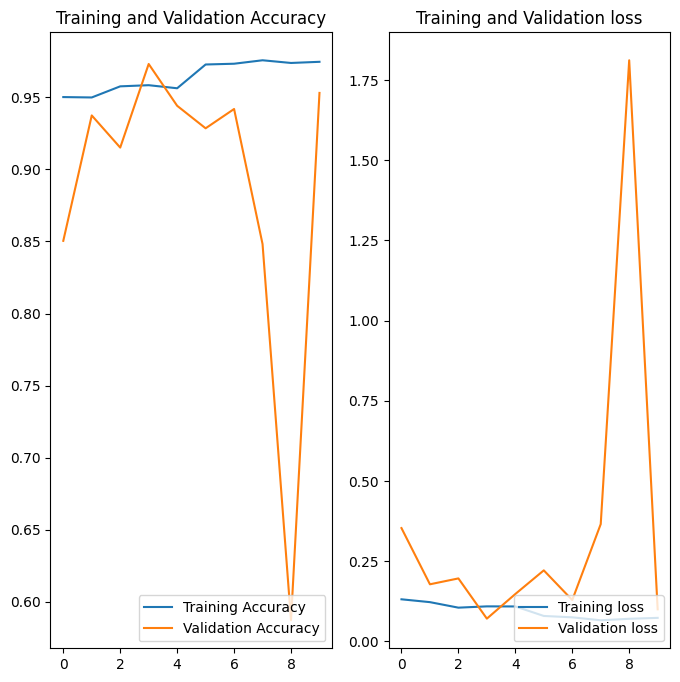

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label='Training loss')
plt.plot(range(EPOCHS), val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

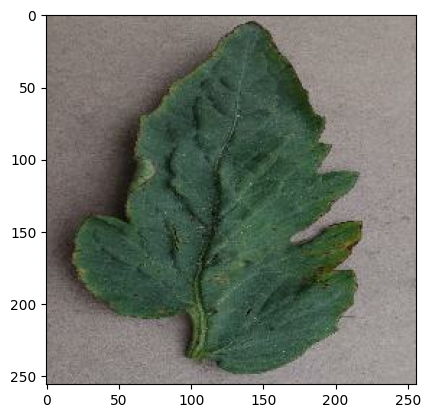

In [69]:
#making predictions
for images_batch, label_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

prediction the first image
image1 True Label:  Tomato___healthy
1/1 [==============================] - 1s 834ms/step
Images1's prediction label :  Tomato___healthy


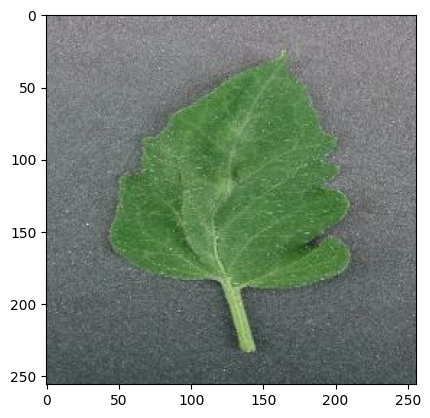

In [70]:
#making predictions
for images_batch, label_batch in test_ds.take(1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()

    print("prediction the first image")
    plt.imshow(image1)
    print('image1 True Label: ', class_names[label1])

    batch_prediction= model.predict(images_batch)
    print("Images1's prediction label : ", class_names[np.argmax(batch_prediction[0])])

In [71]:
#function to predict with confidence
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 62ms/step


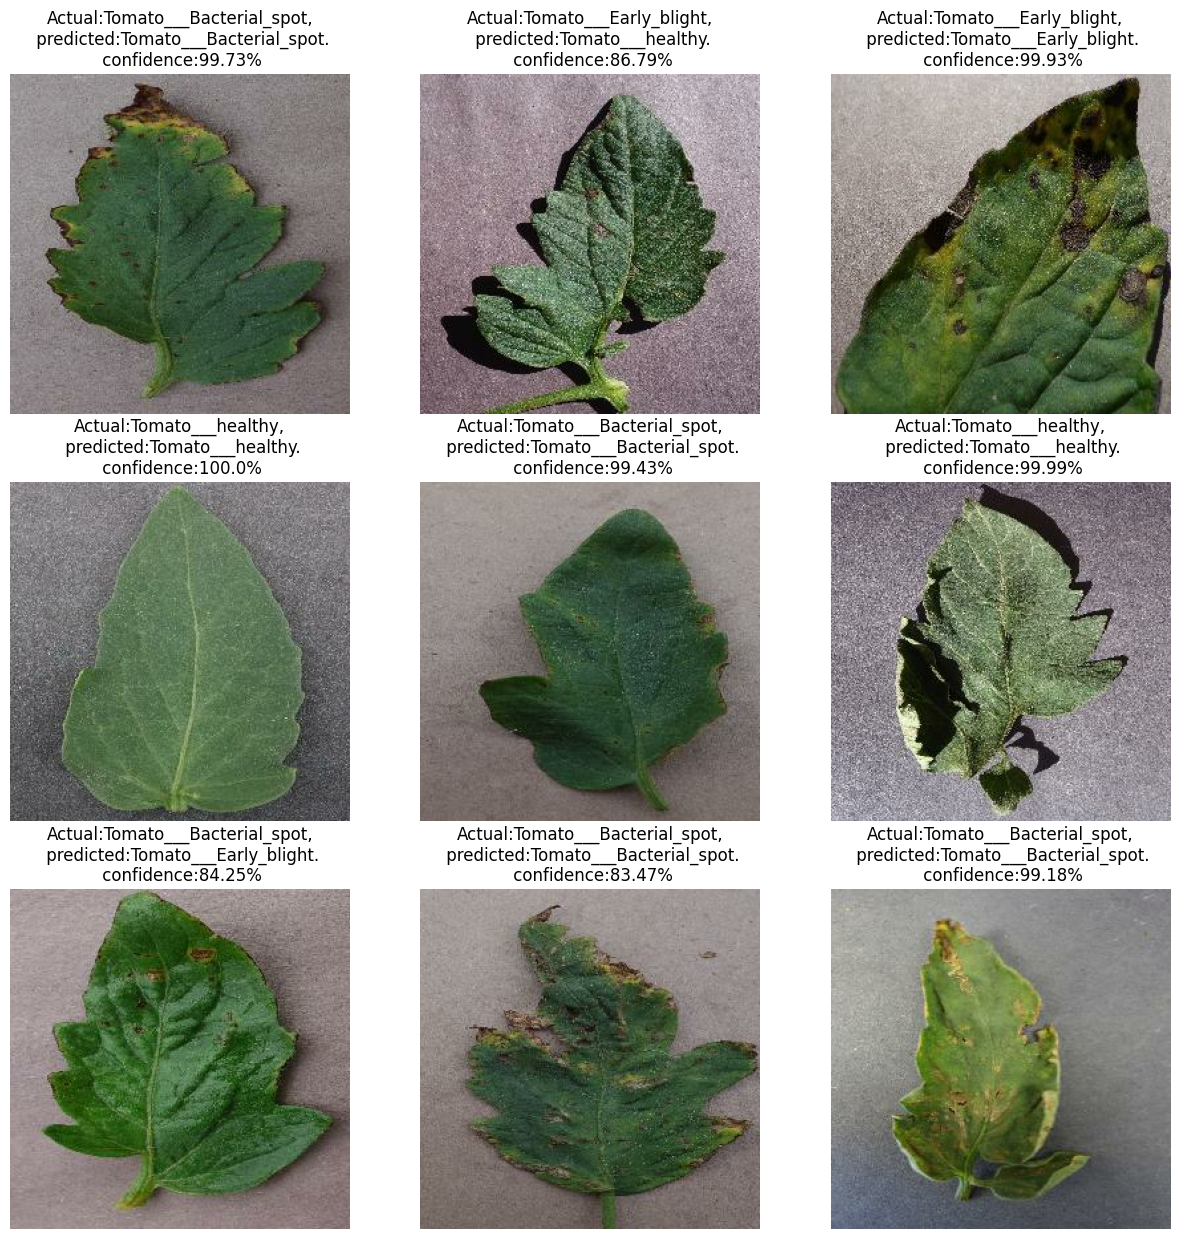

In [72]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis("off")

In [73]:
#saving the model
model_version=2
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets


In [74]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models")+[0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets


INFO:tensorflow:Assets written to: ../saved_models/3\assets


In [75]:
model.save("../tomatoes.h5")